In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
x_start = 0
x_length = 2
t_start = 0.0
t_end = 20.0
cf = 0.1

In [3]:
Nx_f1 = 200
Nt_f1 = int( ((t_end - t_start)/(2*cf))*(Nx_f1) )
dx_f1 = (x_start + x_length)/Nx_f1
dt_f1 = np.around((t_end - t_start)/int(Nt_f1),5)
var_x_f1 = np.arange(x_start,x_length + x_start,dx_f1)
var_t_f1 = np.arange(t_start,t_end+dt_f1,dt_f1)

Nx_f2 = 400
Nt_f2 = int (((t_end - t_start)/(2*cf))*(Nx_f2) )
dx_f2 = (x_start + x_length)/Nx_f2
dt_f2 = np.around((t_end - t_start)/int(Nt_f2),5)
var_x_f2 = np.arange(x_start,x_length + x_start,dx_f2)
var_t_f2 = np.arange(t_start,t_end+dt_f2,dt_f2)

Nx_f3 = 800
Nt_f3 = int (((t_end - t_start)/(2*cf))*(Nx_f3) )
dx_f3 = (x_start + x_length)/Nx_f3
dt_f3 = np.around((t_end - t_start)/int(Nt_f3),6)
var_x_f3 = np.arange(x_start,x_length + x_start,dx_f3)
var_t_f3 = np.arange(t_start,t_end+dt_f3,dt_f3)

In [4]:
def integrate_simpson(h,param_y):
    t1,t2 = 0,0
    for i in range (1,len(param_y)-1): 
        if (i%2 == 1): #odd integers
            t1 = t1 + param_y[i]
            #print("t1[i]",i)
        #print(t1)
        if (i%2 == 0) : #even integers
            t2 = t2 + param_y[i]
            #print("t2[i]",i)
        #print(t2)
    integral = (h/3)*(param_y[0] + 4*t1 + 2*t2 + param_y[len(param_y)-1] )
    return integral

# Calculate l2 Norm
def calculate_l2_norm(dx,var):
    integrate = integrate_simpson(dx,(var)**2)
    l2_norm = np.sqrt(integrate)
    return l2_norm

In [5]:
two_full_crossing_time = (x_start + x_length)
two_full_crossing_iter_f1 = (np.where(np.isclose(two_full_crossing_time,var_t_f1,1E-5))[0])
two_full_crossing_iter_f2 = (np.where(np.isclose(two_full_crossing_time,var_t_f2,1E-5))[0])
two_full_crossing_iter_f3 = (np.where(np.isclose(two_full_crossing_time,var_t_f3,1E-5))[0])
total_crossings = int(t_end/two_full_crossing_time)
crossing_times = np.zeros(total_crossings)

for i in range (1,total_crossings+1):
    crossing_times[i-1] = var_t_f1[int(i*two_full_crossing_iter_f1)]
    
phi_f1 = np.load("phi_crossings,Nx=200,t=(0.0,20.0),x_s,x_l=(0.0,2.0).npy")
phi_f2 = np.load("phi_crossings,Nx=400,t=(0.0,20.0),x_s,x_l=(0.0,2.0).npy")
phi_f3 = np.load("phi_crossings,Nx=800,t=(0.0,20.0),x_s,x_l=(0.0,2.0).npy")

#Error
error_f1 = np.zeros((total_crossings,Nx_f1))
error_f2 = np.zeros((total_crossings,Nx_f2))
error_f3 = np.zeros((total_crossings,Nx_f3))
error_f1_l2norm = np.zeros(total_crossings)
error_f2_l2norm = np.zeros(total_crossings)
error_f3_l2norm = np.zeros(total_crossings)
for i in range (total_crossings):
    error_f1[i] = (phi_f1[i+1] - phi_f1[0])
    error_f2[i] = (phi_f2[i+1] - phi_f2[0])
    error_f3[i] = (phi_f3[i+1] - phi_f3[0])
    error_f1_l2norm[i] = calculate_l2_norm(dx_f1,error_f1[i])
    error_f2_l2norm[i] = calculate_l2_norm(dx_f2,error_f2[i])
    error_f3_l2norm[i] = calculate_l2_norm(dx_f3,error_f3[i])

In [6]:
# #Plot error between analytical and numerical solutions

# ###-------------------------------------------------------------------------------###
# def plot_crossing_errors(title,x_label,y_label,x_param1,y_param1,x_param2,y_param2,x_param3,y_param3,Nx,dt):
#     fig_dpi = 150
#     fig, ax = plt.subplots(figsize=(2560/fig_dpi,1440/fig_dpi),dpi = fig_dpi)
#     plt.title(title,fontsize=18)
#     plt.xlabel(x_label,fontsize=16)
#     plt.ylabel(y_label,fontsize=16)
#     plt.plot(x_param1,y_param1)
#     plt.plot(x_param2,y_param2)
#     plt.plot(x_param3,y_param3)
#     plt.legend(Nx,title="Spatial resolution Nx:",loc='upper right')
#     plt.text(0.02, 0.90, ("dt =",dt),
#              transform=ax.transAxes,fontsize=14)
#     plt.show()
    
# for i in range (total_crossings):
#     plot_crossing_errors(r'Error in Scalar wave - $\phi$ at time t=%0.1f'%(crossing_times[i]),
#       "x - position",r'(Error in $\phi$)/$dt^{2}$',
#       var_x_f1,np.transpose(error_f1[i]/dt_f1**2),
#       var_x_f2,np.transpose(error_f2[i]/dt_f2**2),
#       var_x_f3,np.transpose(error_f3[i]/dt_f3**2),
#       [Nx_f1,Nx_f2,Nx_f3],[dt_f1,dt_f2,dt_f3])
    
# ###-----------------------------------------------------------------------------------------###

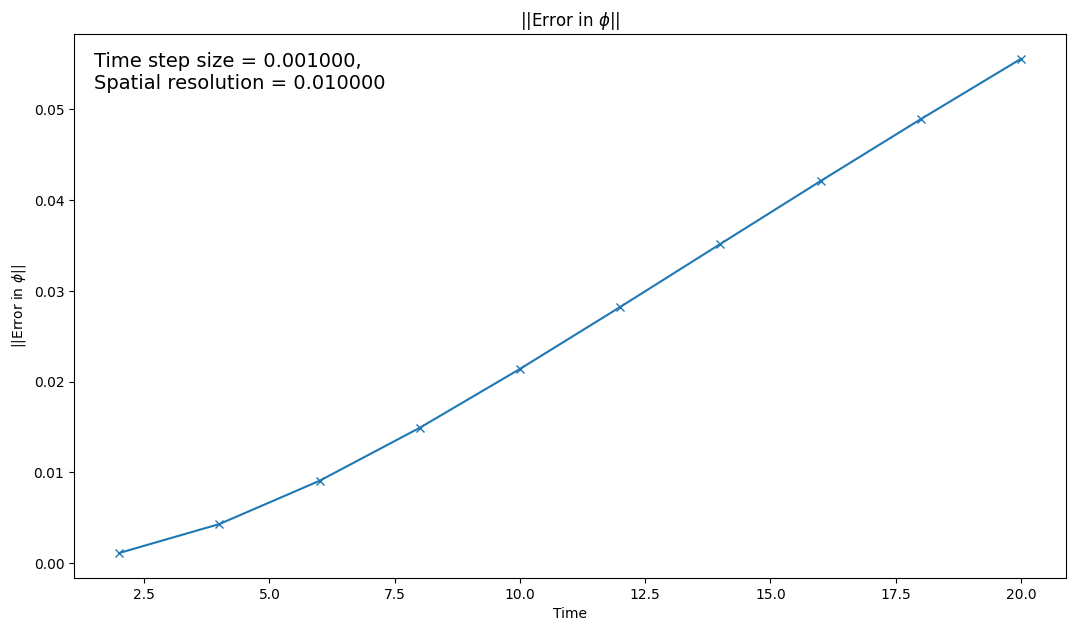

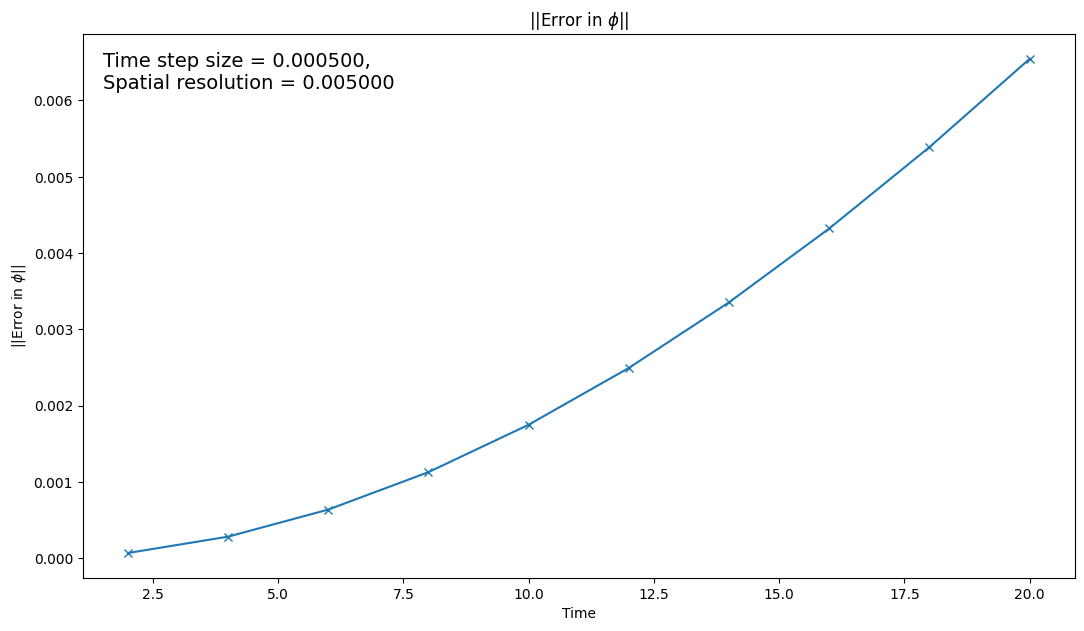

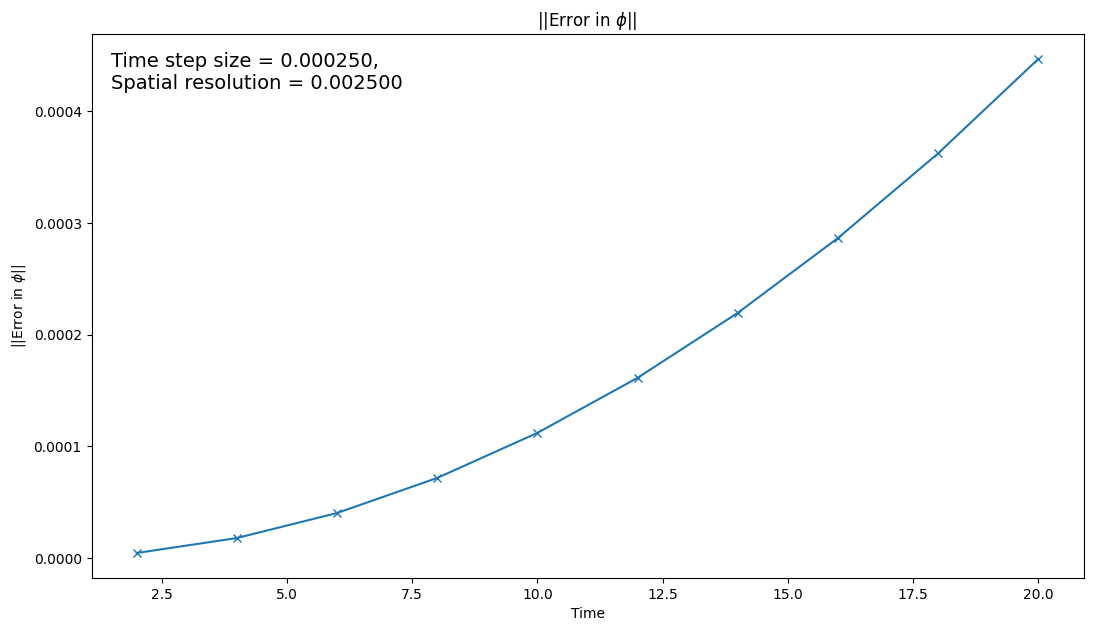

In [7]:
def plot_l2_norm_error(title,x_label,y_label,x_param,y_param,dt,dx):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    #ax.axis([-1.1,+1.1,-1.5,1.5])
    plt.plot(x_param,y_param,'-x')
    plt.text(0.02, 0.90, 'Time step size = %.6f,\nSpatial resolution = %.6f'%(dt,dx),
             transform=ax.transAxes,fontsize=14)
    plt.show()

plot_l2_norm_error(r'||Error in $\phi$||','Time','||Error in $\phi$||',
     crossing_times,error_f1_l2norm,dt_f1,dx_f1)
plot_l2_norm_error(r'||Error in $\phi$||','Time','||Error in $\phi$||',
     crossing_times,error_f2_l2norm,dt_f2,dx_f2)
plot_l2_norm_error(r'||Error in $\phi$||','Time','||Error in $\phi$||',
     crossing_times,error_f3_l2norm,dt_f3,dx_f3)

In [8]:
phi_1 = np.load("phi,Nx=200,t=(0.0,2.0),x_s,x_l=(0.0,2.0).npy")
phi_2 = np.load("phi,Nx=400,t=(0.0,2.0),x_s,x_l=(0.0,2.0).npy")
phi_3 = np.load("phi,Nx=800,t=(0.0,2.0),x_s,x_l=(0.0,2.0).npy")

In [9]:
# Select (x,t)-points for convergence test
x_sample_size = 0.1
x_length = 2.0
time_sample_size = 0.1
time_sample_length = 2.0
x_arr = np.zeros(int(x_length/x_sample_size))
sample_times = np.arange(0,time_sample_length + time_sample_size,time_sample_size)

In [10]:
phi_1h = np.zeros((len(sample_times),len(x_arr)))
phi_2h = np.zeros((len(sample_times),len(x_arr)))
phi_4h = np.zeros((len(sample_times),len(x_arr)))

In [11]:
# Sampled x-array
j = 0
for i in range (0,int(Nx_f1),int(x_sample_size/dx_f1)):
    #print("i,j",i,j)
    x_arr[j] = var_x_f1[i]
    j=j+1
print("x-coordinates:",x_arr)

x-coordinates: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


In [12]:
m = 0
flag = False
for i in range (0,len(phi_1),int(time_sample_size/dt_f1)): # sample time
    n = 0
    for j in range (0,int(Nx_f1),int(x_sample_size/dx_f1)): #sample position
        phi_1h[m][n] = phi_1[i][j]
        if(var_x_f1[j]!=x_arr[n]):
            print("Sampling for 1h resolution failed",var_x_f1[j],x_arr[n])
            flag = True
            break        
        n = n+1
    if (flag == True):
        break
    m = m+1

m = 0
flag = False
for i in range (0,len(phi_2),int(time_sample_size/dt_f2)): # sample time
    n = 0
    for j in range (0,int(Nx_f2),int(x_sample_size/dx_f2)): #sample position
        phi_2h[m][n] = phi_2[i][j]
        if(var_x_f2[j]!=x_arr[n]):
            print("Sampling for 2h resolution failed",var_x_f2[j],x_arr[n])
            flag = True
            break
        n = n+1
    if (flag == True):
        break
    m = m+1
    
m = 0
flag = False
for i in range (0,len(phi_3),int(time_sample_size/dt_f3)): # sample time
    n = 0
    for j in range (0,int(Nx_f3),int(x_sample_size/dx_f3)): #sample position
        phi_4h[m][n] = phi_3[i][j]
        if(var_x_f3[j]!=x_arr[n]):
            print("Sampling for 4h resolution failed",var_x_f3[j],x_arr[n])
            flag = True
            break
        n = n+1
    if (flag == True):
        break
    m = m+1

In [13]:
#Plot wave function at sampled time and position

# def plots(title,x_label,y_label,x_param,y_param,time):
#     fig_dpi = 150
#     fig, ax = plt.subplots(figsize=(2560/fig_dpi,1440/fig_dpi),dpi = fig_dpi)
#     plt.title(title,fontsize=18)
#     plt.xlabel(x_label,fontsize=16)
#     plt.ylabel(y_label,fontsize=16)
#     plt.plot(x_param,y_param,"-x")
#     plt.grid(axis="both")
#     plt.legend([Nx_f1,Nx_f2,Nx_f3],title="Resolutions",loc='upper right')
#     plt.text(0.02, 0.90, 'Time = %.2f'%(time),
#              transform=ax.transAxes,fontsize=14)
#     plt.show()

# for i in range (len(sample_times)):
#     plots(r'Scalar wave - $\phi$ evolution',
#           "x - position",r'$\phi$ - wave function',
#           x_arr,np.transpose([phi_1h[i],phi_2h[i],phi_4h[i]]),sample_times[i])

Convergence test calculations:

$$\dfrac{\phi^{(x,t)}_{4h}-\phi^{(x,t)}_{2h}}{\phi^{(x,t)}_{2h}-\phi^{(x,t)}_{1h}} = \dfrac{e_{4h} - e_{2h}}{e_{2h} - e_{1h}}  = \dfrac{(16 -4) A h^2}{(4-1) A h^2} = 4 = 2^p, p = 2$$
$$\left( \phi^{(x,t)}_{4h}-\phi^{(x,t)}_{2h} \right): \left( \phi^{(x,t)}_{2h}-\phi^{(x,t)}_{1h} \right) = 4:1$$

Convergence order, $p = log_{2}(4) = 2$

In [14]:
def plot_error(title,x_label,y_label,x_param,y_param1,y_param2,time):
    fig_dpi = 100
    fig, ax = plt.subplots(figsize=(1280/fig_dpi,720/fig_dpi),dpi = fig_dpi)
    plt.title(title,fontsize=12)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    plt.ylim(-0.01,0.01)
    plt.text(0.02, 0.90, 'Time = %.2f'%(time),
             transform=ax.transAxes,fontsize=14)
    plt.plot(x_param,y_param1,'-x')
    plt.plot(x_param,y_param2,'-x')
    plt.grid(axis="both")
    plt.legend([r"$\phi^{(x,t)}_{2h}-\phi^{(x,t)}_{1h}$",
                r"$4*(\phi^{(x,t)}_{4h}-\phi^{(x,t)}_{2h})$"],
                title="Error",loc='upper right')
    plt.show()

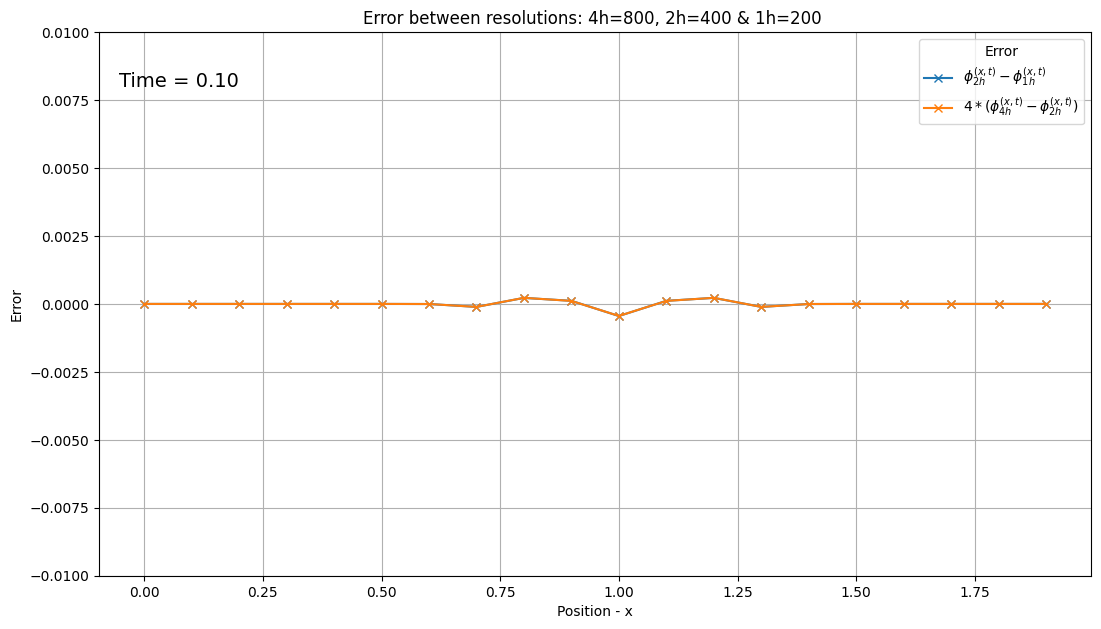

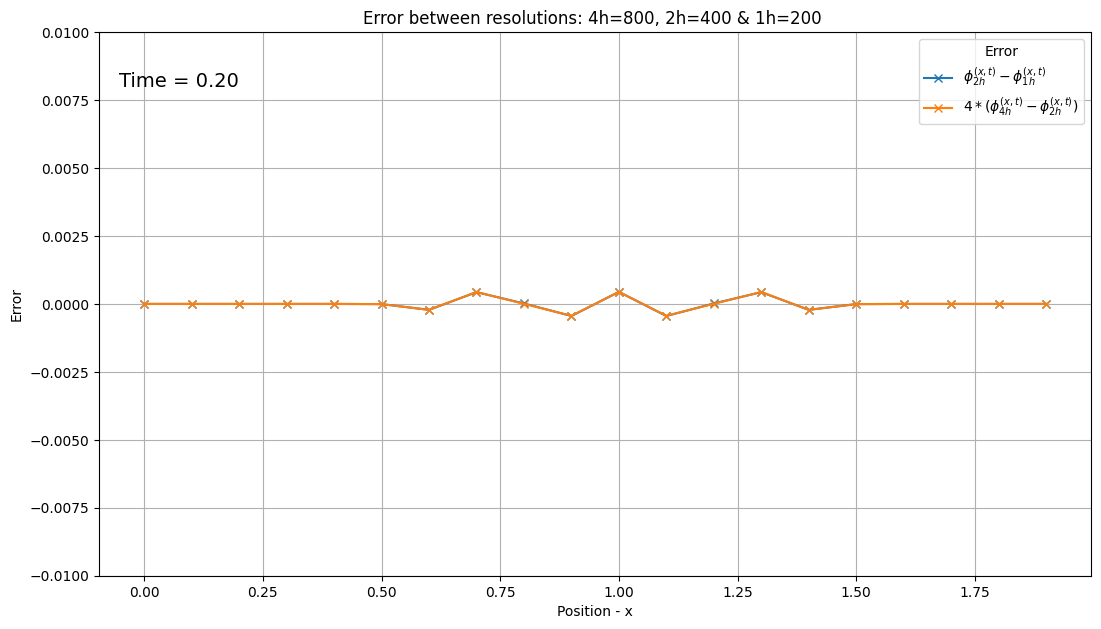

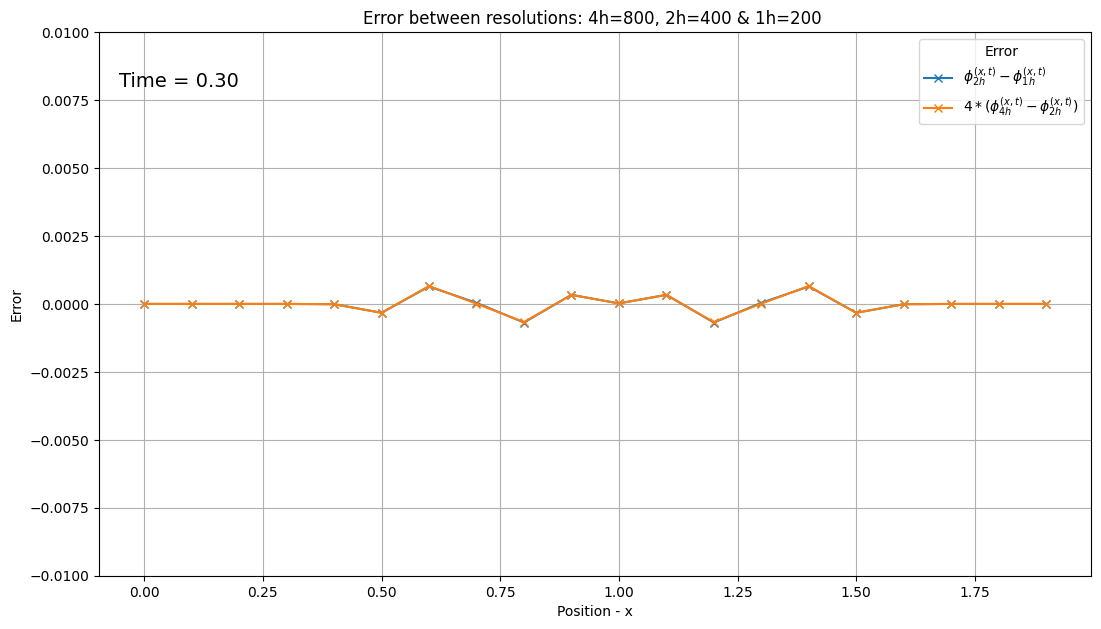

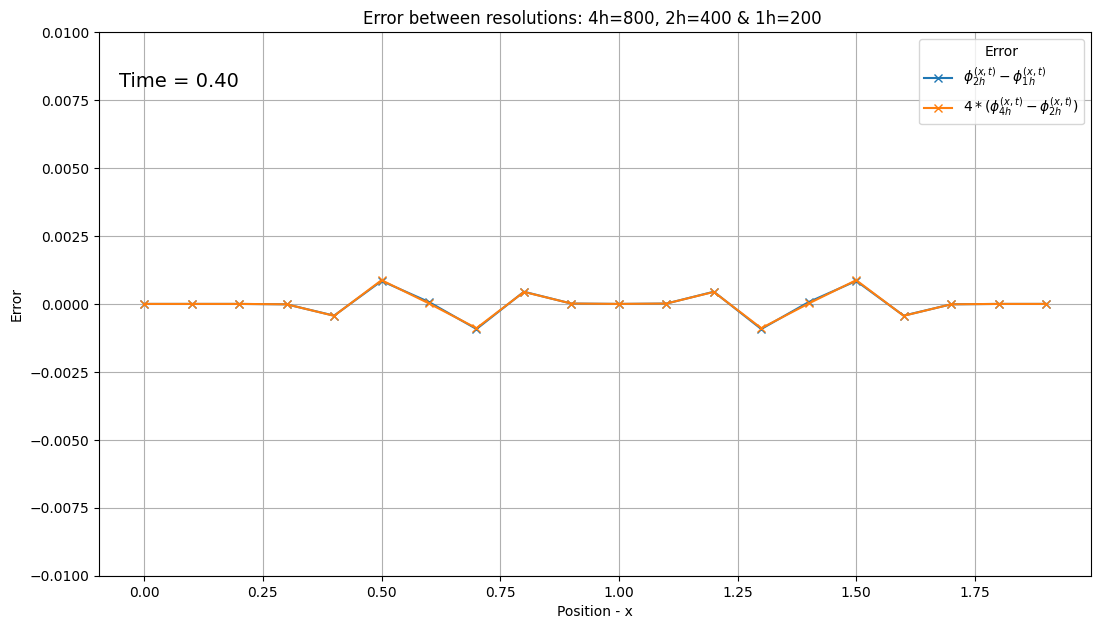

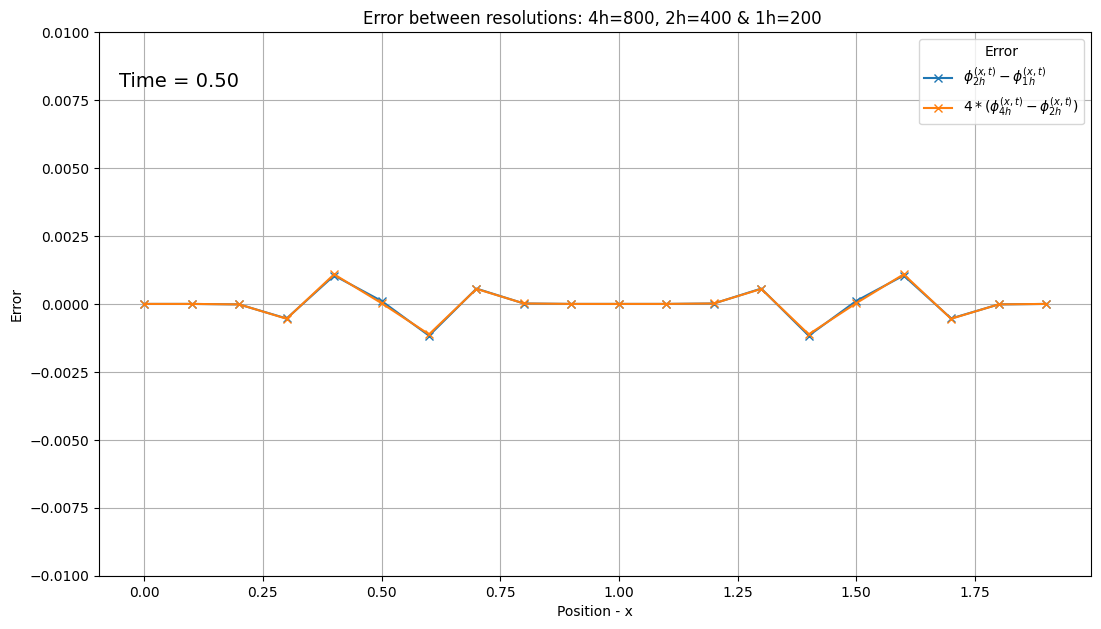

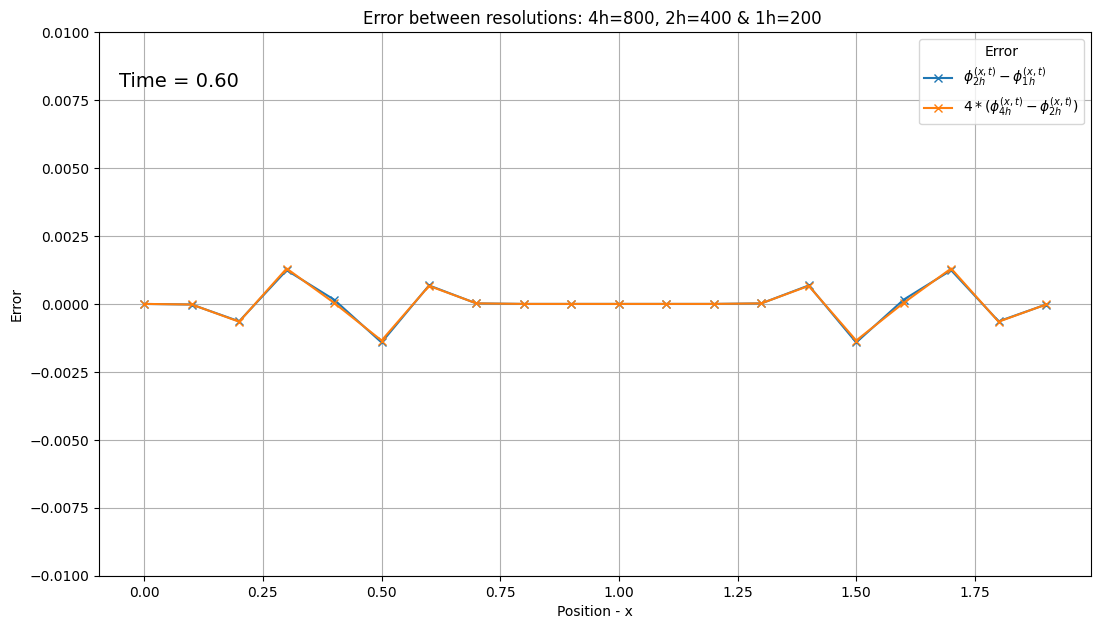

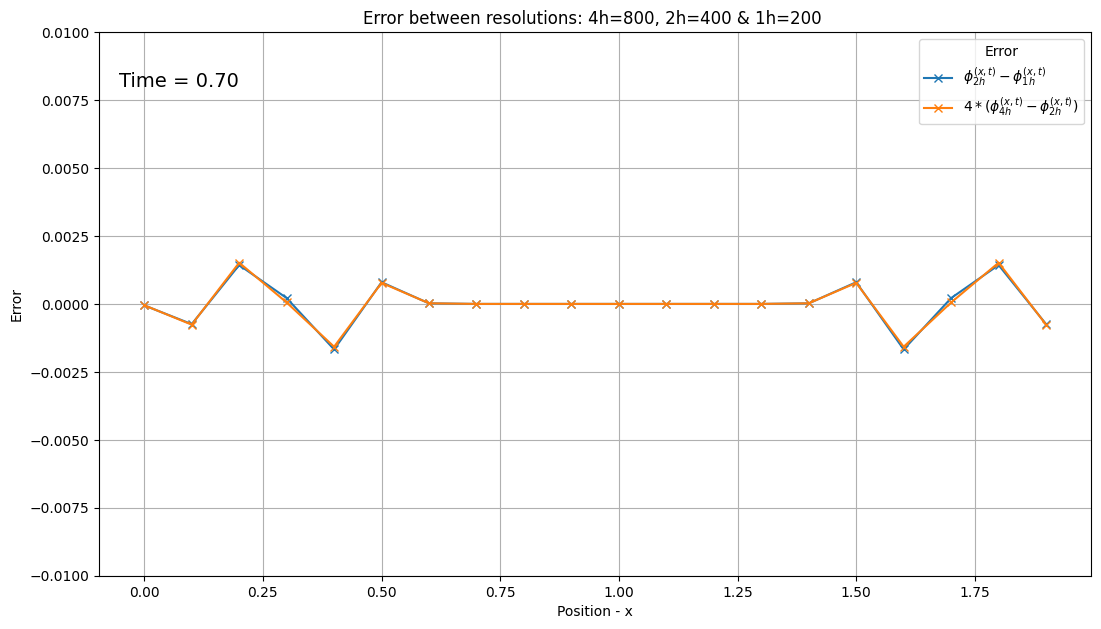

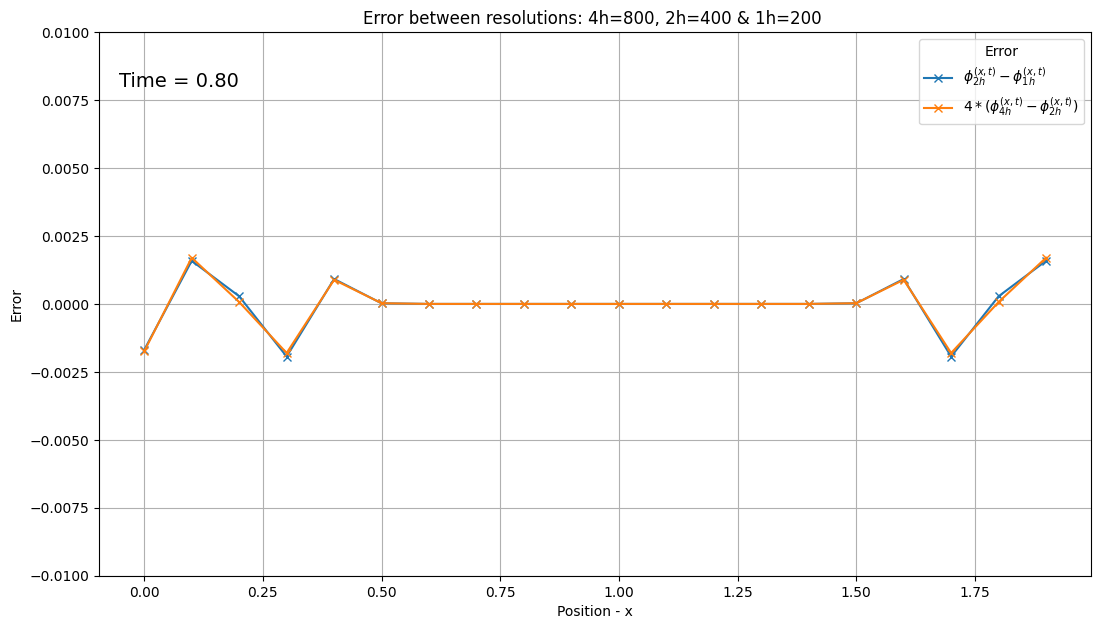

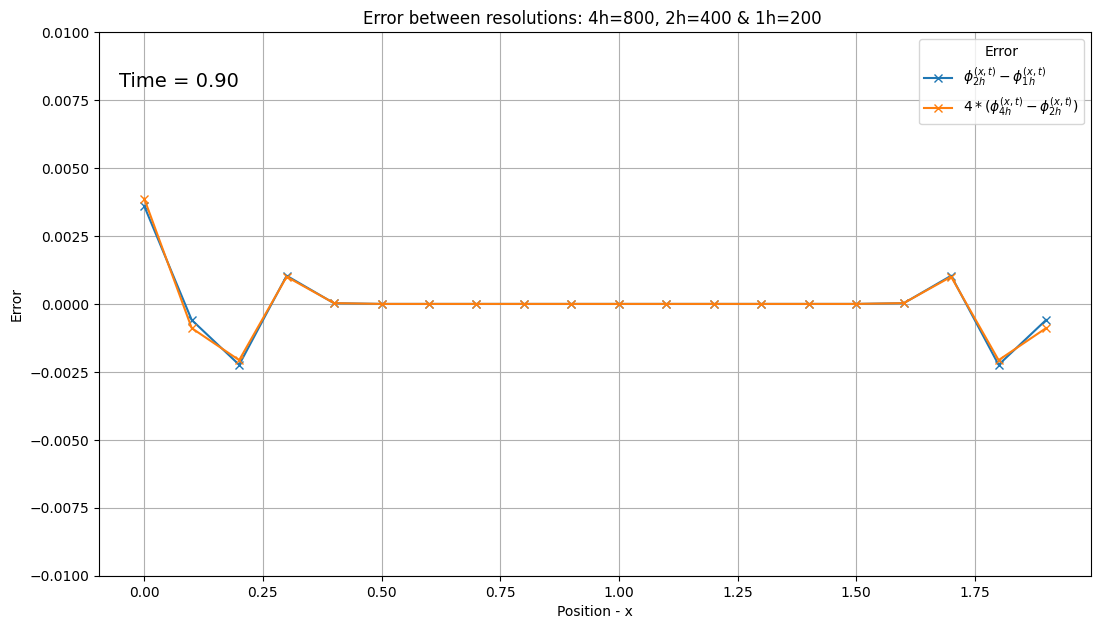

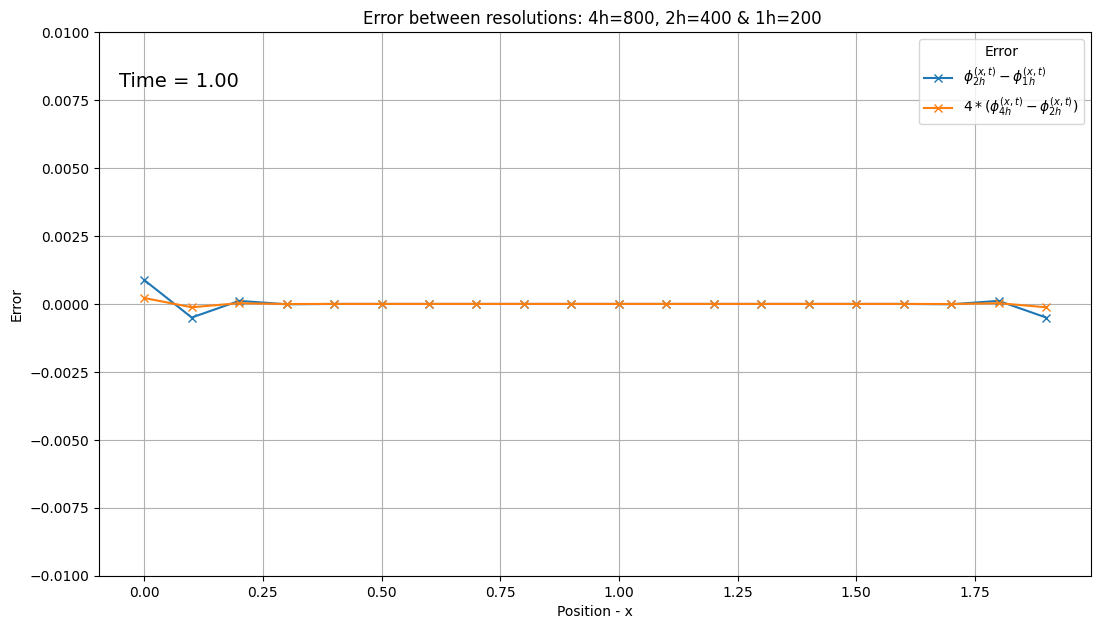

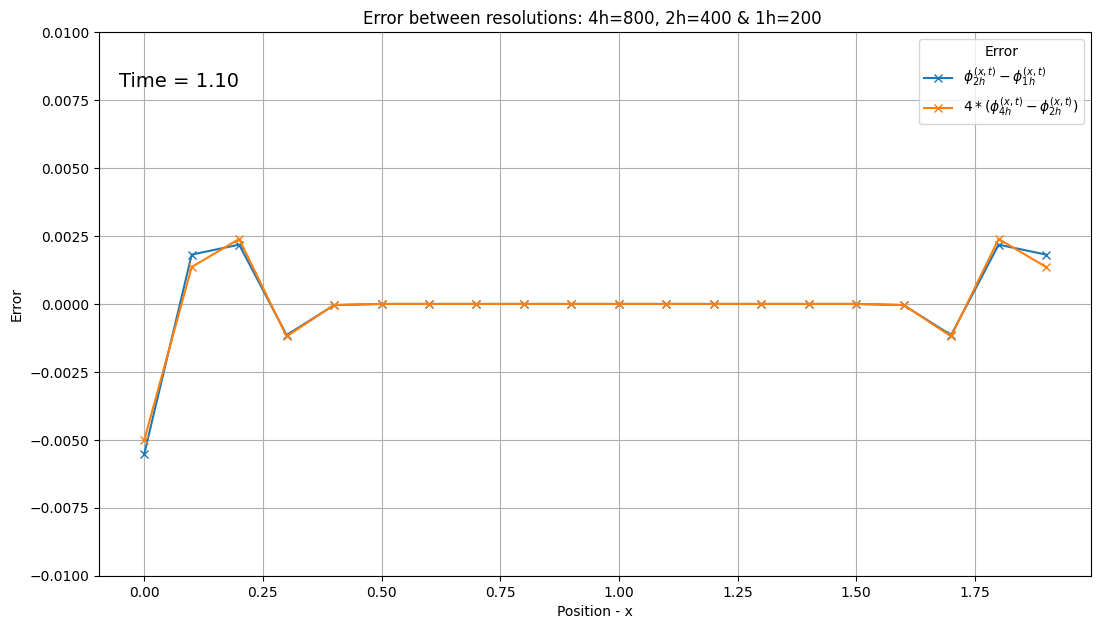

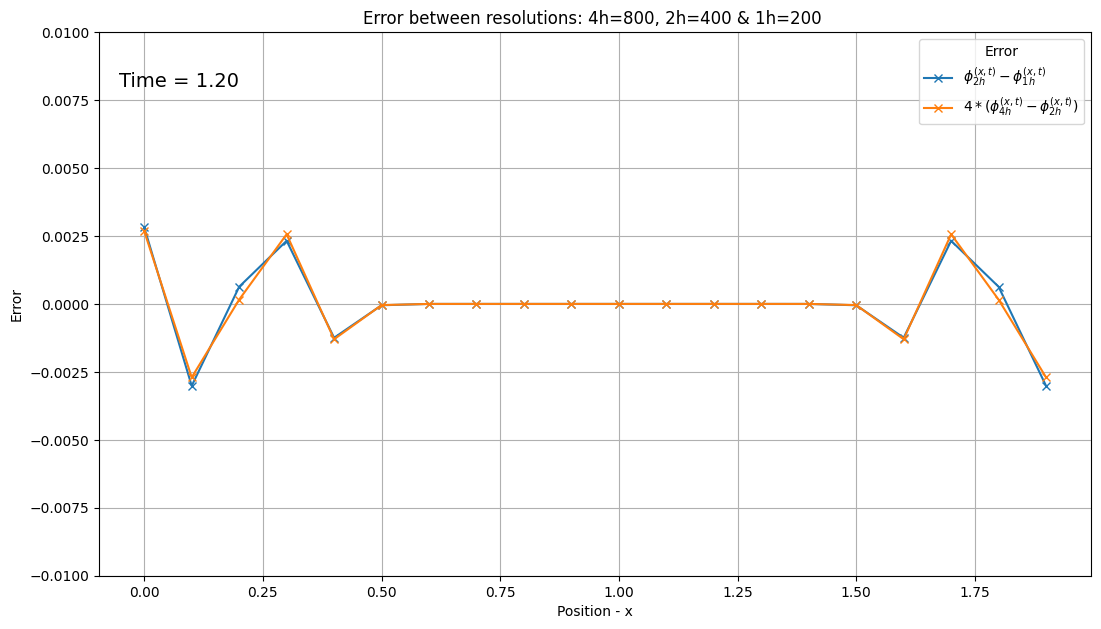

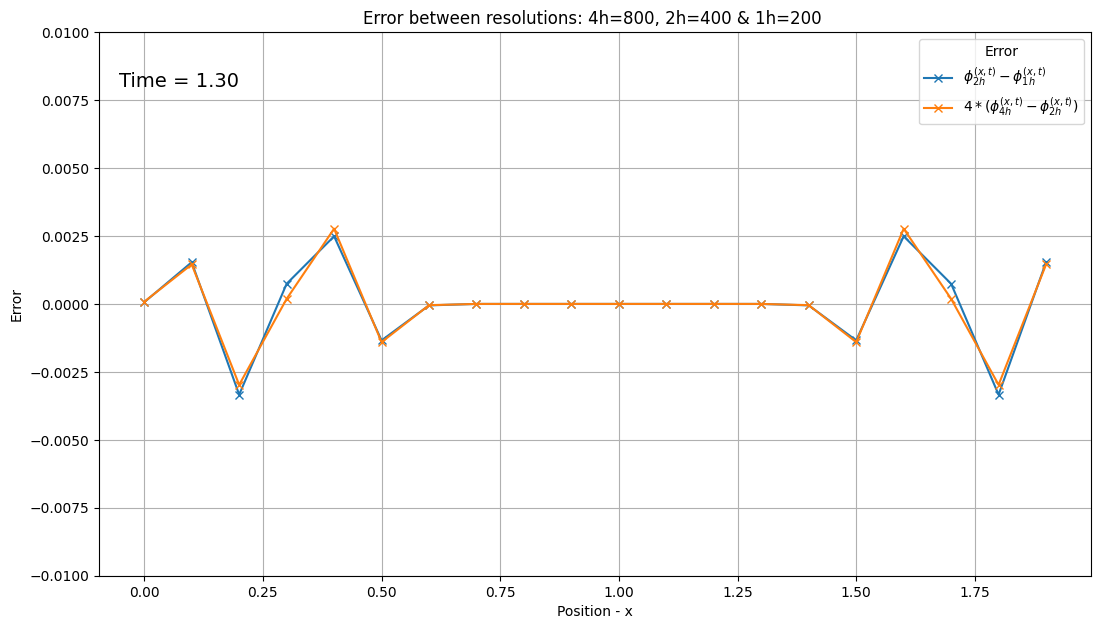

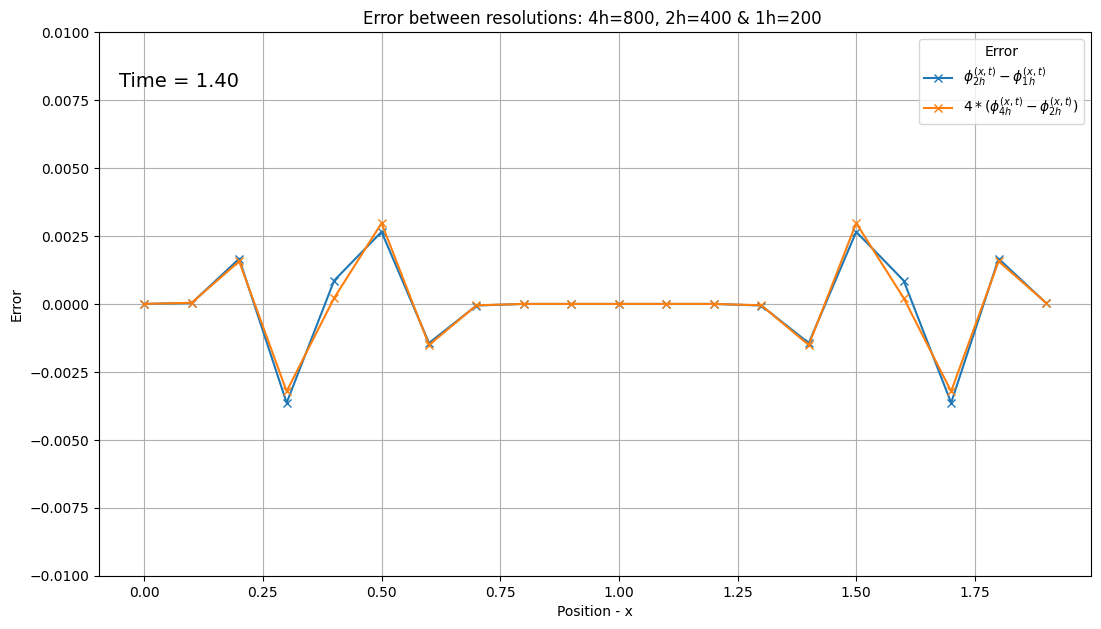

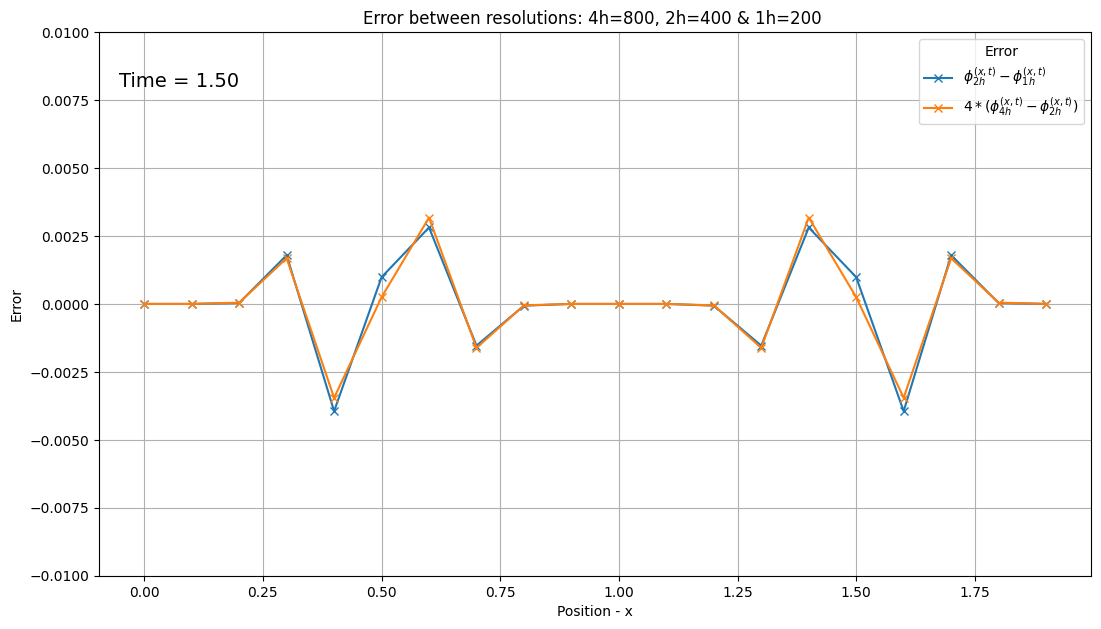

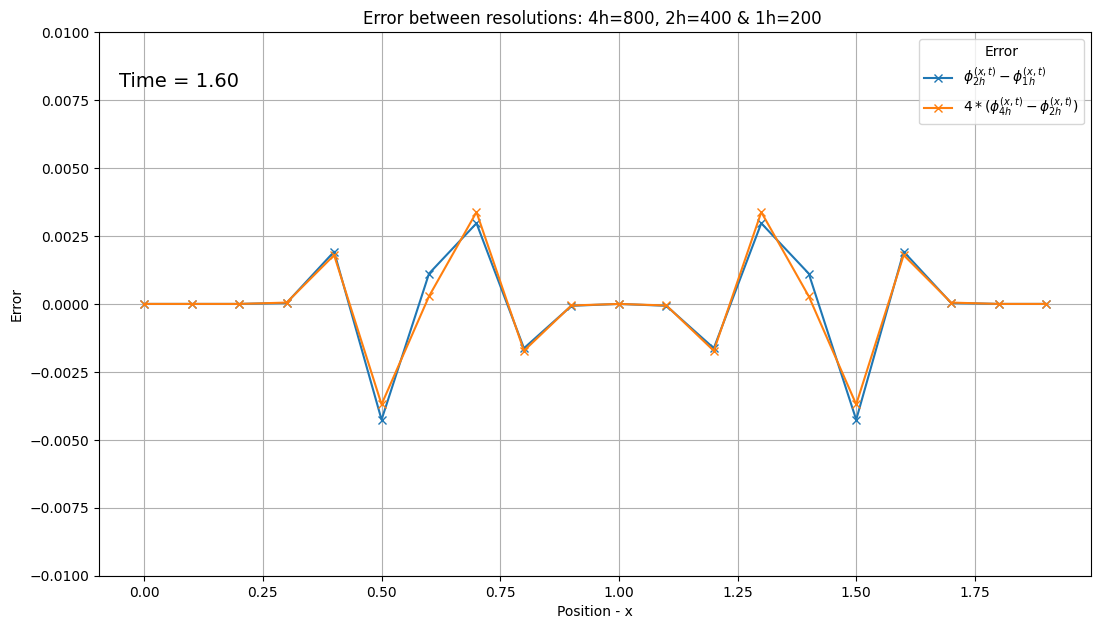

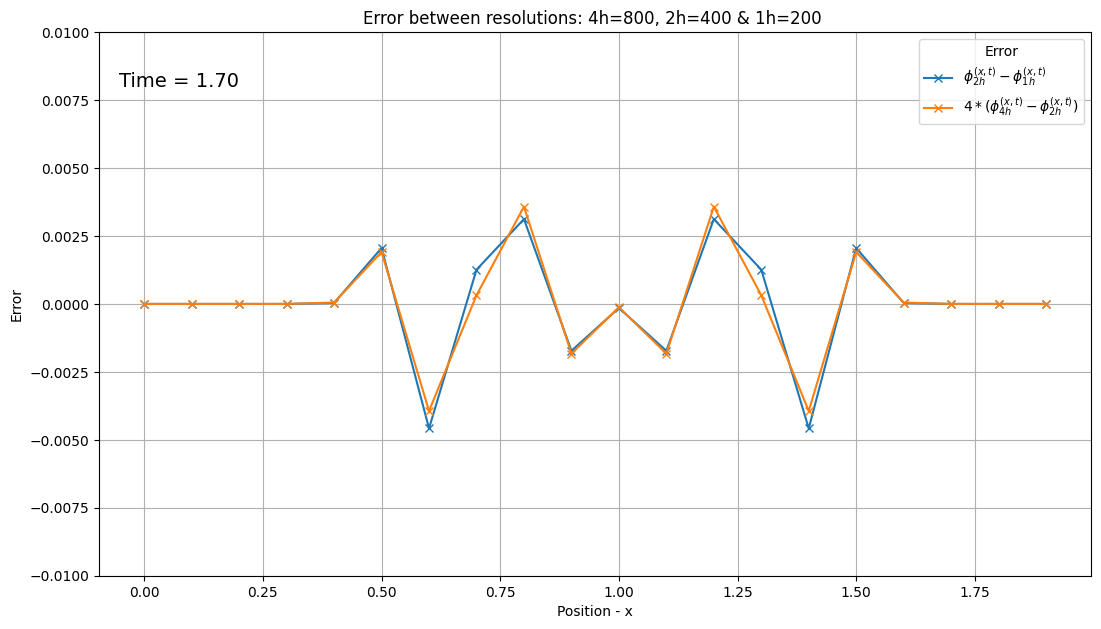

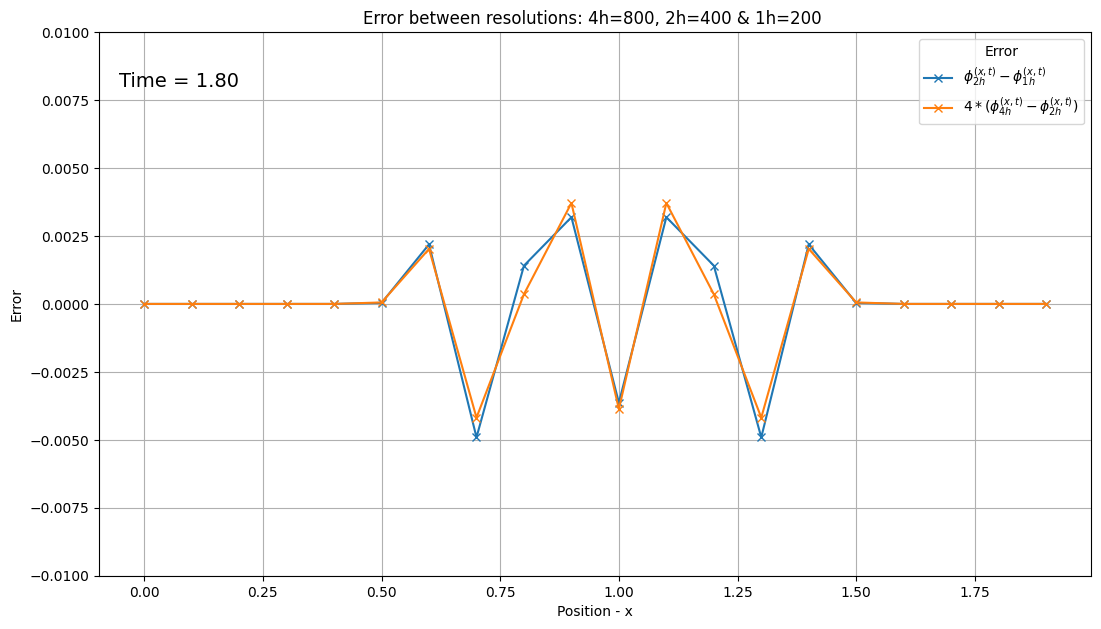

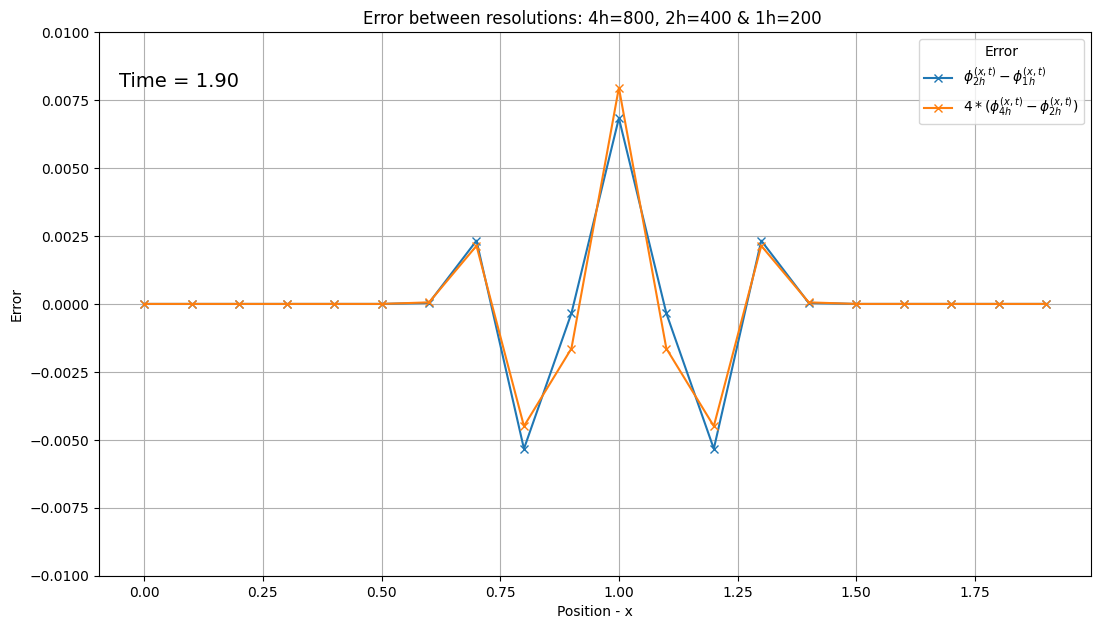

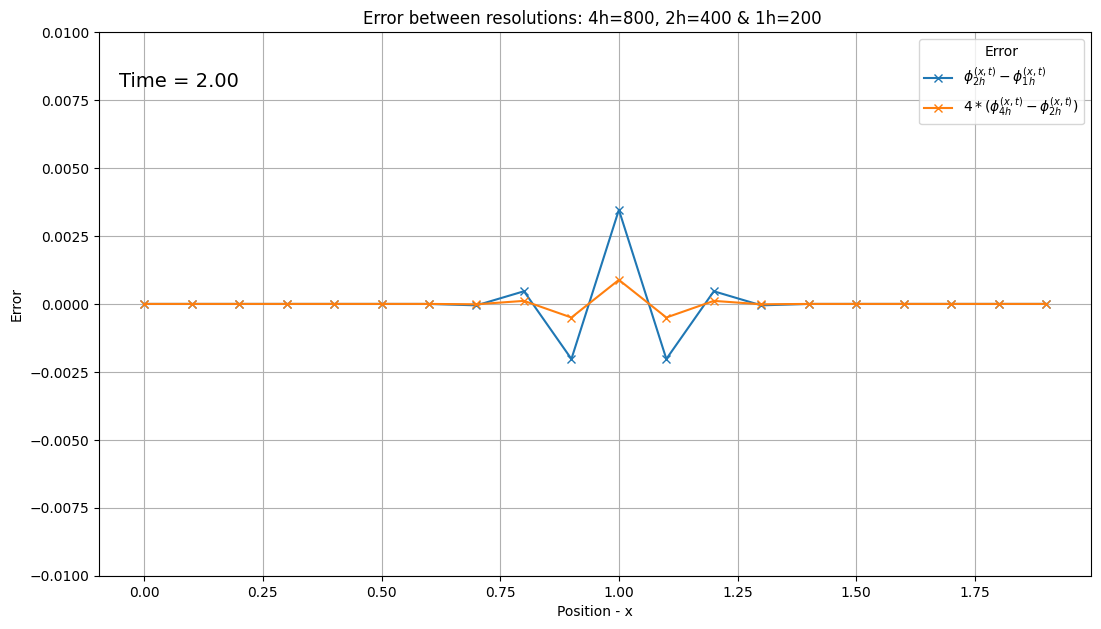

In [15]:
for i in range (1,len(sample_times)):
    plot_error("Error between resolutions: 4h=%d, 2h=%d & 1h=%d "%(Nx_f3,Nx_f2,Nx_f1),"Position - x",
               "Error",
               x_arr,(phi_2h[i] - phi_1h[i]),
           4*(phi_4h[i] - phi_2h[i]),
           sample_times[i])
